In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection

In [3]:
mushrooms = pd.read_csv("mushrooms.csv")
mushrooms

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,smooth,orange,orange,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,smooth,silky,white,white,white,one,evanescent,white,several,leaves


In [5]:
#将字符型数据因子化处理，将其转换为整数型数据
columns = mushrooms.columns[1:]
for column in columns:
    mushrooms[column] = pd.factorize(mushrooms[column])[0]
mushrooms

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,edible,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,edible,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,poisonous,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,edible,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,4,0,0,1,3,1,0,1,10,...,0,0,6,7,2,0,0,8,5,6
8120,edible,0,0,0,1,3,1,0,1,10,...,0,0,6,7,1,0,0,8,3,6
8121,edible,3,0,0,1,3,1,0,1,1,...,0,0,6,7,2,0,0,8,5,6
8122,poisonous,4,1,0,1,6,0,0,0,8,...,0,3,0,0,0,0,1,4,3,6


In [6]:
predictors = mushrooms.columns[1:]
X_train,X_test,y_train,y_test = model_selection.train_test_split(mushrooms[predictors],mushrooms['type'],test_size=0.25,random_state=10)

In [8]:
#构建多项式贝叶斯分类器的类
from sklearn import naive_bayes
mnb = naive_bayes.MultinomialNB()

In [9]:
#基于训练数据集的拟合
mnb.fit(X_train,y_train)

MultinomialNB()

In [10]:
#基于测试数据集的预测
mnb_pred = mnb.predict(X_test)

In [11]:
#构建混淆矩阵
cm = pd.crosstab(mnb_pred,y_test)

Text(33.0, 0.5, '')

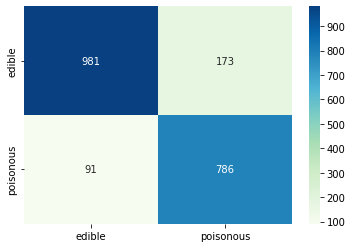

In [16]:
#绘制混淆矩阵图
import seaborn as sns
sns.heatmap(cm,annot=True,cmap='GnBu',fmt='d')
plt.xlabel("")
plt.ylabel("")

In [18]:
from sklearn import metrics
print('模型的准确率为:',metrics.accuracy_score(y_test,mnb_pred))
print('模型的评估报告:\n',metrics.classification_report(y_test,mnb_pred))

模型的准确率为: 0.8700147710487445
模型的评估报告:
               precision    recall  f1-score   support

      edible       0.85      0.92      0.88      1072
   poisonous       0.90      0.82      0.86       959

    accuracy                           0.87      2031
   macro avg       0.87      0.87      0.87      2031
weighted avg       0.87      0.87      0.87      2031



In [19]:
#计算正例的预测概率，用于生成ROC曲线的数据
y_score = mnb.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test.map({'edible':0,'poisonous':1}),y_score)

In [20]:
#计算auc的值
roc_auc = metrics.auc(fpr,tpr)

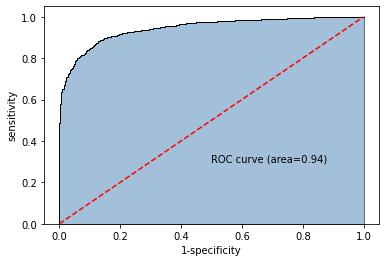

In [21]:
#绘制面积图
plt.stackplot(fpr,tpr,color='steelblue',alpha=0.5,edgecolor='black')
#添加边际线
plt.plot(fpr,tpr,color='black',lw=1)
#添加对角线
plt.plot([0,1],[0,1],color='red',linestyle='--')
#添加文本信息
plt.text(0.5,0.3,'ROC curve (area=%0.2f)'%roc_auc)
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')
plt.show()